Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [3]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [4]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

import unicodecsv
daily_engagement = []
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [5]:
project_submissions = []
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Fixing Data Types

In [6]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [7]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [8]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement and unique_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [10]:
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [11]:
## Number of line in enrollments file
len(enrollments)

1640

In [12]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
unique_engagement_students = set()
for engagement in daily_engagement:
    unique_engagement_students.add(engagement['account_key'])
len(unique_engagement_students)

1237

## Missing Engagement Records

In [13]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break

         

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

In [14]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print(enrollment)
        num_problem_students += 1

num_problem_students


OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_account=set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_account.add(enrollment['account_key'])
len(udacity_test_account)

6

In [16]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_account:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [18]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not(enrollment['is_canceled'] and enrollment['days_to_cancel']<=7):
        account_key = enrollment['account_key']
        engagement_date=enrollment['join_date']
                
        if account_key not in paid_students or \
        engagement_date>paid_students[account_key]:
            paid_students[account_key] = engagement_date
len(paid_students)

995

## Getting Data from First Week

In [19]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [20]:
# Keep only the students that paid
def remove_free_trials_cancel(data):
    new_data = []    
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [21]:
# Apply previous function to all three datasets, to remove the students that quit after the free trial phase
paid_enrollments = remove_free_trials_cancel(non_udacity_enrollments)
paid_engagements = remove_free_trials_cancel(non_udacity_engagement)
paid_submissions = remove_free_trials_cancel(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1293
134549
3618


In [22]:

#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement in paid_engagements:
    engagement_date = engagement['utc_date']
    account_key = engagement['account_key']
    join_date = paid_students[account_key]
    if within_one_week(join_date, engagement_date):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [23]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [24]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [25]:
# Summarize the data about minutes spent in the classroom
# Note: Python 3 returns a dict for the function values(), not a list as on Python 2
total_minutes = list(total_minutes_by_account.values())

import numpy as np

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [26]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
total_minutes_weird = []
for account_key in total_minutes_by_account:
    if total_minutes_by_account[account_key] > 3000:
        total_minutes_weird.append(total_minutes_by_account[account_key])
        print(engagement_by_account[account_key])
    

[OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')]), OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_comp

## Lessons Completed in First Week

In [27]:
# Function to create a dict of list grouping by given key
def groupe_data(key, data):
    from collections import defaultdict
    data_by_account = defaultdict(list)
    for data_record in data:
        account_key = data_record[key]
        data_by_account[account_key].append(data_record)
    return data_by_account

In [28]:
# Function to compute the total number of item for a specific key in a given dictionary
def total_number(data, key):
    total_number_by_key = {}
    for key_record, data_record in data.items():
        total = 0
        for data_record_record in data_record:
            total += data_record_record[key]
        total_number_by_key[key_record] = total
    return total_number_by_key

In [29]:
def describe_data(data_list):
    import numpy as np

    print('Mean:', np.mean(data_list))
    print('Standard deviation:', np.std(data_list))
    print('Minimum:', np.min(data_list))
    print('Maximum:', np.max(data_list))
    return

In [30]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week.
engagement_by_account = groupe_data('account_key',paid_engagement_in_first_week)
total_lessons_by_account = total_number(engagement_by_account, 'lessons_completed')
total_lessons = list(total_lessons_by_account.values())
describe_data(total_lessons)

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [31]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

#First, creation of a field has_visited to know if a student has visited the course that day (0 or 1)
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['num_courses_visited']>0:
        engagement_record['has_visited']=1
    else:
        engagement_record['has_visited']=0
engagement_by_account = groupe_data('account_key',paid_engagement_in_first_week)
total_days_by_account = total_number(engagement_by_account, 'has_visited')
total_days = list(total_days_by_account.values())
describe_data(total_days)

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [32]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
project_passed = ['PASSED', 'DISTINCTION']
pass_subway_projects = set()
passing_engagement = []
non_passing_engagement = []
for project_record in paid_submissions:
    if project_record['lesson_key'] in subway_project_lesson_keys:
        if project_record['assigned_rating'] in project_passed:
            pass_subway_projects.add(project_record['account_key'])
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in pass_subway_projects:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [33]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

##First, for students who passed
engagement_by_account_project_passed = groupe_data('account_key',passing_engagement)
total_days_by_account_project_passed = total_number(engagement_by_account_project_passed, 'has_visited')
total_days_project_passed = list(total_days_by_account_project_passed.values())
describe_data(total_days_project_passed)
total_minutes_by_account_project_passed = total_number(engagement_by_account_project_passed, 'total_minutes_visited')
total_minutes_project_passed = list(total_minutes_by_account_project_passed.values())
describe_data(total_minutes_project_passed)
total_lessons_by_account_project_passed = total_number(engagement_by_account_project_passed, 'lessons_completed')
total_lessons_project_passed = list(total_lessons_by_account_project_passed.values())
describe_data(total_lessons_project_passed)

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


In [34]:
######################################
#                 12                 #
######################################

## Sedonc, students who didn't pass
engagement_by_account_project_not_passed = groupe_data('account_key',non_passing_engagement)
total_days_by_account_project_not_passed = total_number(engagement_by_account_project_not_passed, 'has_visited')
total_days_project_not_passed = list(total_days_by_account_project_not_passed.values())
describe_data(total_days_project_not_passed)
total_minutes_by_account_project_not_passed = total_number(engagement_by_account_project_not_passed, 'total_minutes_visited')
total_minutes_project_not_passed = list(total_minutes_by_account_project_not_passed.values())
describe_data(total_minutes_project_not_passed)
total_lessons_by_account_project_not_passed = total_number(engagement_by_account_project_not_passed, 'lessons_completed')
total_lessons_project_not_passed = list(total_lessons_by_account_project_not_passed.values())
describe_data(total_lessons_project_not_passed)

Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


## Making Histograms

students who passed:
days spent


(array([87., 82., 79.,  0., 91., 77.,  0., 85., 78., 68.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

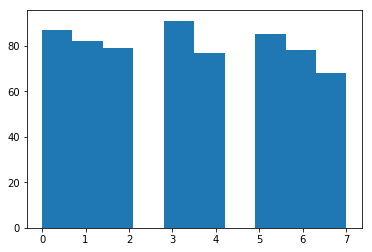

In [35]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%matplotlib inline
import matplotlib.pyplot as plt
print('students who passed:')
print('days spent')
plt.hist(total_days_project_passed)

students who passed:
minutes spent


(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

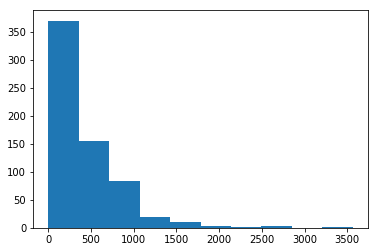

In [36]:
print('students who passed:')
print('minutes spent')
plt.hist(total_minutes_project_passed)

students who passed:
lessons completed


(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

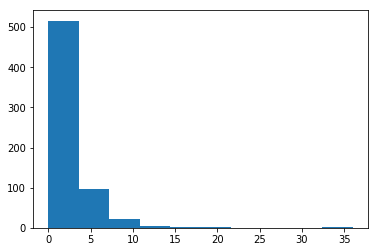

In [37]:
print('students who passed:')
print('lessons completed')
plt.hist(total_lessons_project_passed)

days spent


(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

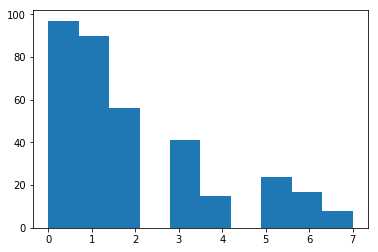

In [38]:
print('days spent')
plt.hist(total_days_project_not_passed)

students who did not pass:
minutes spent


(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

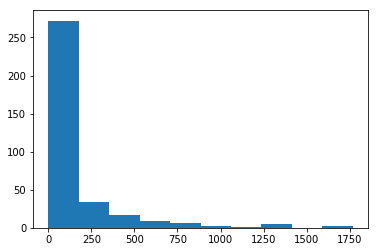

In [39]:
print('students who did not pass:')
print('minutes spent')
plt.hist(total_minutes_project_not_passed)

students who did not pass:
lessons completed


(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

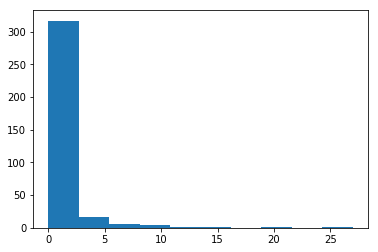

In [40]:
print('students who did not pass:')
print('lessons completed')
plt.hist(total_lessons_project_not_passed)

## Improving Plots and Sharing Findings

Text(0.5,1,'Distribution of classroom visits in the first week for students who do not pass the subway project')

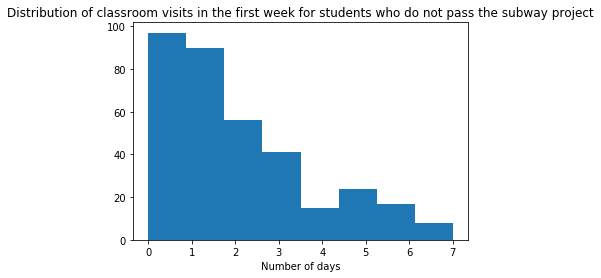

In [41]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
import seaborn as sns

plt.hist(total_days_project_not_passed, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')



Text(0.5,1,'Distribution of classroom visits in the first week for students who pass the subway project')

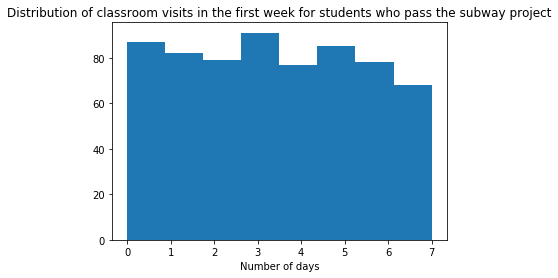

In [42]:
import seaborn as sns

plt.hist(total_days_project_passed, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')